
# Part I: Data Question & Sources


## 1. Data Question:

Since 2020 the use of telemedicine has skyrocketed and continues to be a key method for healthcare delivery. It has become a subject of interest to the broader healthcare industry, as evidenced by increased investments from healthcare companies as well as federal and state governments. For example, the Biden administration recently announced it will invest over 770 million for “telemedicine pods” in rural areas across the U.S. - 746,000 of this will be used for TN counties. A state task force dedicated to rural health outcomes recommended an additional 66,900 should be earmarked for expanding telemedicine capabilities in rural communities.

The potential applications for telemedicine are broad and emergent. Many doctors and therapists now offer live video calls for routine issues like medication management, mental health services, or follow-up care after a hospital stay. Other applications of telehealth, such as remote patient monitoring and mobile health applications, showcase the potential of telehealth to radically transform the healthcare landscape. 

In particular, there is much opportunity in rural applications of telehealth to address lack of accessibility. TN has a high rural population, with 82% of its counties classified as rural. According to the TN Rural Health Care Task Force, rural residents are at particular risk for “poor health outcomes, including mental health challenges, obesity, and substance misuse”. 

This project focuses on using data exploration and analysis to address the question: **``How can telehealth best be used to target health challenges in TN?``**


## 2. Data Sources:

The data sources include two publiclly available datasets on telehealth trends among medicare and medicaid recipients respectively. 

There is also a robust dataset of various health factors and health outcomes collected in yearly datasets by the County Health Rankings & Roadmaps (CHR&R)  

##### 1. [Medicare Telehealth Trends](https://catalog.data.gov/dataset/medicare-telemedicine-snapshot) (medicare_trends_df)

The Medicare Telehealth Trends dataset provides information about people with Medicare who used telehealth services between January 1, 2020 and September 30, 2023. 

The data was also used to generate the [Medicare Telehealth Trends Report](https://data.cms.gov/sites/default/files/2024-03/Medicare%20Telehealth%20Trends%20Snapshot%2020240307_508.pdf).

[Data Dictionary](https://data.cms.gov/sites/default/files/2023-05/c22a72d5-1b0c-47db-9d19-5fa75df96f4e/Medicare%20Telehealth%20Trends%20Report%20Data%20Dictionary_20220906_508.pdf) 

##### 2. [Medicaid & Chip Telehealth Trends](https://data.medicaid.gov/dataset/651fa253-4dd4-4867-8725-2b5ae1dd5ce9?conditions[0][property]=state&conditions[0][value]=Tennessee&conditions[0][operator]=%3D&conditions[1][property]=dataquality&conditions[1][value]=DQ&conditions[1][operator]=%3C%3E#data-table) (medicaid_trends_df)

This data set includes monthly counts and rates (per 1,000 beneficiaries) of services provided via telehealth, including live audio video, remote patient monitoring, store and forward, and other telehealth, to Medicaid and CHIP beneficiaries, by state. Data was collected between January 2018 and December 2022. 

Note: Some states have serious data quality issues for one or more months, making the data unusable for calculating telehealth services measures...Cells with a value of “DQ” (in the DataQuality column). indicate that data were suppressed due to unusable data. Additionally, some cells have a value of “DS”. This indicates that data were suppressed for confidentiality reasons because the group included fewer than 11 beneficiaries.

There is no data dictionary for this data set

##### 3. [County Health Rankings and Roadmaps - TN](https://www.countyhealthrankings.org/health-data/tennessee?year=2023&measure=Mental+Health+Providers) (CHRR_df)

County Health Rankings & Roadmaps (CHR&R), a program of the University of Wisconsin Population Health Institute, is dedicated to understanding why there are differences in health within and across communities...CHR&R provides a snapshot of the health of nearly every county in the nation...

Will look at only 2023 data (since 2024 is incomplete)

What Impacts Health? - See the [CHRR Health Model](https://www.countyhealthrankings.org/what-impacts-health/county-health-rankings-model)

[Data Dictionary](https://docs.google.com/spreadsheets/d/18rWeCagA0EANH2OibUtBEG1RMDMgdEL4drCRTT9ekWg/edit?gid=1203469383#gid=1203469383)


# Part II: Data Import & Cleaning


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify  # pip install squarify (algorithm for treemap)

## 1. Medicare Data

In [2]:
#Read in csv for medicare telehealth trends
medicare_trends_df = pd.read_csv('capstone_data/Medicare/US_medicare_telehealth_data_2020_to_2023.csv')
medicare_trends_df.head()

,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth
0,2020,Overall,National,All,All,All,All,All,All,30946785.0,3.224489e+07,14826919.0,0.4791
1,2020,Overall,National,All,All,All,All,All,Rural,7179538.0,7.490301e+06,2858284.0,0.3981
2,2020,Overall,National,All,All,All,All,All,Urban,23696871.0,2.462914e+07,11944230.0,0.5040
3,2020,Overall,National,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
4,2020,Overall,National,All,All,All,All,0-64,All,4088345.0,4.291403e+06,2322324.0,0.5680


In [3]:
#Renamed some of the columns based on their definitions so I can remember what they mean while I'm working with them
medicare_trends_df = medicare_trends_df.rename(columns={"Total_Bene_TH_Elig": "nunique_eligible_for_telehealth", "Total_PartB_Enrl": "total_enrollees_Part_B", 'Total_Bene_Telehealth':'nunique_users_of_telehealth', 'Pct_Telehealth':'pct_actual_users_out_of_eligible_users'})

#Multiply the pct column by 100 and round it, for easier readibility
medicare_trends_df['pct_actual_users_out_of_eligible_users'] = round((medicare_trends_df['pct_actual_users_out_of_eligible_users']*100),2)

In [4]:
#Add a new column called "year-quarter" to help break out changes by quarter per year
medicare_trends_df['year-quarter'] = medicare_trends_df['Year'].astype(str) + "-" + medicare_trends_df['quarter'].astype(str) 
medicare_trends_df.head()

,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,nunique_eligible_for_telehealth,total_enrollees_Part_B,nunique_users_of_telehealth,pct_actual_users_out_of_eligible_users,year-quarter
0,2020,Overall,National,All,All,All,All,All,All,30946785.0,3.224489e+07,14826919.0,47.91,2020-Overall
1,2020,Overall,National,All,All,All,All,All,Rural,7179538.0,7.490301e+06,2858284.0,39.81,2020-Overall
2,2020,Overall,National,All,All,All,All,All,Urban,23696871.0,2.462914e+07,11944230.0,50.40,2020-Overall
3,2020,Overall,National,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN,2020-Overall
4,2020,Overall,National,All,All,All,All,0-64,All,4088345.0,4.291403e+06,2322324.0,56.80,2020-Overall


## 2. Medicaid & CHIP Data

In [5]:
medicaid_trends_df = pd.read_csv('capstone_data/Medicaid/US_Telehealth-Services-Provided-to-the-MedicaidCHIP-Population.csv')

In [6]:
medicaid_trends_df.head()

,State,Year,Month,TelehealthType,ServiceType,ServiceCount,RatePer1000Beneficiaries,DataQuality
0,Alabama,2018,201801,Live audio/video,All,"6,905",5.6,NaN
1,Alabama,2018,201801,Other telehealth,All,-,0,NaN
2,Alabama,2018,201801,Remote patient monitoring,All,-,0,NaN
3,Alabama,2018,201801,Store and forward,All,-,0,NaN
4,Alabama,2018,201802,Live audio/video,All,"4,821",3.9,NaN


In [7]:
#First we need to filter out "unusable" data
medicaid_trends_df = medicaid_trends_df[medicaid_trends_df['DataQuality']!='Unusable']
medicaid_trends_df = medicaid_trends_df[medicaid_trends_df['ServiceCount']!=' DS ']

In [8]:
#Then we need to change the service counts to summable data types

#Let's remove commas
medicaid_trends_df = medicaid_trends_df.replace(',','', regex=True)

#Then convert to numeric data type, coerce non-numbers to NaN
medicaid_trends_df['ServiceCount'] = medicaid_trends_df['ServiceCount'].apply(pd.to_numeric,errors='coerce')
medicaid_trends_df['RatePer1000Beneficiaries'] = medicaid_trends_df['RatePer1000Beneficiaries'].apply(pd.to_numeric,errors='coerce')
medicaid_trends_df.head()

,State,Year,Month,TelehealthType,ServiceType,ServiceCount,RatePer1000Beneficiaries,DataQuality
0,Alabama,2018,201801,Live audio/video,All,6905.0,5.6,NaN
1,Alabama,2018,201801,Other telehealth,All,NaN,0.0,NaN
2,Alabama,2018,201801,Remote patient monitoring,All,NaN,0.0,NaN
3,Alabama,2018,201801,Store and forward,All,NaN,0.0,NaN
4,Alabama,2018,201802,Live audio/video,All,4821.0,3.9,NaN


## 3. TN County Health Rankings & Roadmaps

In order to get workable data, I downloaded the CHRR "2023 Tennessee Data" [available here](https://www.countyhealthrankings.org/health-data/tennessee/data-and-resources) 

- I chose the 2023 data set because I want the most recent (but also complete) data set. 
- I then [opened the data in google sheets](https://docs.google.com/spreadsheets/d/1KXcrV9TsnZVKNOwzPdFz0CMRN-HucbbreOU3uATFW34/edit?gid=1441039258#gid=1441039258) 
- I separated out and saved the first sheet called "Introduction", which is basically the [data dictionary](https://docs.google.com/spreadsheets/d/18rWeCagA0EANH2OibUtBEG1RMDMgdEL4drCRTT9ekWg/edit?gid=1203469383#gid=1203469383)
- I combined the two sheets called "Ranked Measure Data" and "Additional Measure Data" into a new workbook
- I removed the top row bc there were merged columns
- I removed all the confidence interval columns since I won't be using them
- I also renamed the z-score columns so none have an identical name
- I kept only columns that may be related to my analysis 
- Finally I [downloaded the result](https://docs.google.com/spreadsheets/d/1HbkNcmNVu_r4-1v-McU214BBaMfUkkywQ251ns_FDjY/edit?gid=1115464274#gid=1115464274) into an excel sheet which I read in below (the download and the original are both also in the capstone data folder)

I could have also merged the two worksheets on FIPS, and dropped all the non-important columns (but using google sheets was faster in this instance)

In [9]:
CHRR_df_all = pd.read_excel('capstone_data/CHRR/2023 TN CHRR Data.xlsx')

#There are a lot of columns so I set the display to show all of them
pd.set_option('display.max_columns', None)

#Will also remove the "All" County since this will create outliers in the analysis
CHRR_df = CHRR_df_all[CHRR_df_all['County']!='All']
CHRR_df

,FIPS,State,County,Average Number of Mentally Unhealthy Days,Mentally Unhealthy Days Z-Score,% Adults with Obesity,Adult Obesity Z-Score,Food Environment Index,Food Environment Index Z-Score,% Physically Inactive,Physically Inactive Z-Score,% With Access to Exercise Opportunities,Exercise Opportunities Z-Score,% Excessive Drinking,Excessive Drinking Z-Score,# Alcohol-Impaired Driving Deaths,# Driving Deaths,% Driving Deaths with Alcohol Involvement,Drunk Driving Deaths Z-Score,# Uninsured,% Uninsured,Uninsured Z-Score,# Primary Care Physicians,Primary Care Physicians Rate,Primary Care Physicians Ratio,PCP Z-Score,# Mental Health Providers,Mental Health Provider Rate,Mental Health Provider Ratio,Mental Health Providers Z-Score,Preventable Hospitalization Rate,Preventable Hospitalization Z-Score,Preventable Hosp. Rate (AIAN),Preventable Hosp. Rate (Asian),Preventable Hosp. Rate (Black),Preventable Hosp. Rate (Hispanic),Preventable Hosp. Rate (White),# Unemployed,Labor Force,% Unemployed,Unemployed Z-Score,% Children in Poverty,Child Poverty Z-Score,% Children in Poverty (AIAN),% Children in Poverty (Asian),% Children in Poverty (Black),% Children in Poverty (Hispanic),% Children in Poverty (White),80th Percentile Income,20th Percentile Income,Income Ratio,Income Z-Score,# Children in Single-Parent Households,# Children in Households,% Children in Single-Parent Households,Children in Single Parent Households Z-Score,Life Expectancy,Life Expectancy (AIAN),Life Expectancy (Asian),Life Expectancy (Black),Life Expectancy (Hispanic),Life Expectancy (White),# Deaths,Age-Adjusted Death Rate,Age-Adjusted Mortality (AIAN),Age-Adjusted Mortality (Asian),Age-Adjusted Mortality (Black),Age-Adjusted Mortality (Hispanic),Age-Adjusted Mortality (White),% Frequent Mental Distress,% Adults with Diabetes,# Food Insecure,% Food Insecure,# Limited Access to Healthy Foods,% Limited Access to Healthy Foods,# Drug Overdose Deaths,Drug Overdose Mortality Rate,Drug Overdose Mortality Rate (AIAN),Drug Overdose Mortality Rate (Asian),Drug Overdose Mortality Rate (Black),Drug Overdose Mortality Rate (Hispanic),Drug Overdose Mortality Rate (White),% Insufficient Sleep,# Uninsured Adults,% Uninsured Adults,# Uninsured Children,% Uninsured Children,Other Primary Care Provider Rate,Other Primary Care Provider Ratio,% Disconnected Youth,Women's Median Earnings,Men's Median Earnings,Gender Pay Gap,Median Household Income,Household Income (AIAN),Household Income (Asian),Household Income (Black),Household Income (Hispanic),Household Income (White),% Household Income Required for Child Care Expenses,# Child Care Centers,"Child Care Centers per 1,000 Children",# Deaths.1,Suicide Rate (Age-Adjusted),Crude Rate,Suicide Rate (AIAN),Suicide Rate (Asian),Suicide Rate (Black),Suicide Rate (Hispanic),Suicide Rate (White),% Households with Broadband Access,# Households with Broadband Access,Population,% Less than 18 Years of Age,% 65 and Over,# Black,% Black,# American Indian or Alaska Native,% American Indian or Alaska Native,# Asian,% Asian,# Native Hawaiian or Other Pacific Islander,% Native Hawaiian or Other Pacific Islander,# Hispanic,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,% Female,# Rural Residents,% Rural
1,47001,Tennessee,Anderson,5.283177,-0.309091,35.5,-0.807675,7.5,-0.465578,25.3,-0.675735,65.243831,-0.749778,17.295554,1.412505,13,55,23.636364,-0.109804,6839,11.281569,-1.035460,37.0,47.70623,2096:1,-0.114695,79.0,101.83562,982:1,-0.139859,2788,-0.632757,NaN,NaN,2090.0,NaN,2790.0,1333,34816,3.828699,-0.570906,18.7,-0.516539,NaN,0.701754,9.574468,13.897937,18.115497,107739,24316,4.430786,-0.332246,4592,16374,28.044461,0.354258,74.7,NaN,NaN,73.2,97.7,74.4,1486,507,NaN,NaN,559.0,NaN,520.0,18,11,11350,15,1984.0,3.0,121.0,52.0,NaN,NaN,NaN,NaN,NaN,35,6066,14,849,5,150,669:1,NaN,39849,48546,0.82,58633,NaN,69276.0,36739.0,63892.0,55827.0,25,50.0,12,75.0,20.0,20.0,NaN,NaN,NaN,NaN,NaN,86,26503,77576,21.2,2

# Part III: Data Exploration & Visualizations

## 1. Initial Exploration

### A. Basic Aggregation Stats

In [10]:
#Use .describe() to get some basic aggregated stats for the data set. 
medicare_stats = round(medicare_trends_df.describe(),2)
medicaid_stats = round(medicaid_trends_df.describe(),2)

In [11]:
#Medicare Stats - telehealth benefit recipients 2020-2023:
medicare_stats.drop(['Year'], axis=1)

,nunique_eligible_for_telehealth,total_enrollees_Part_B,nunique_users_of_telehealth,pct_actual_users_out_of_eligible_users
count,19378.00,19378.00,19349.00,19347.00
mean,509782.63,644732.85,117848.05,23.24
std,2088376.79,2617578.83,544223.71,14.17
min,11.00,16.67,0.00,0.00
25%,18067.50,23625.50,3526.00,12.22
50%,80085.50,103933.00,14521.00,19.71
75%,262988.50,341424.94,51154.00,31.48
max,30946785.00,32344227.67,14826919.00,82.02


In [12]:
#Medicaid Stats - Telehealth services delivered from 2018-2022:
medicaid_stats.drop(['Year','Month','DataQuality'], axis=1)

,ServiceCount,RatePer1000Beneficiaries
count,8498.00,10158.00
mean,34938.93,17.97
std,119101.59,49.25
min,11.00,0.00
25%,72.00,0.00
50%,395.00,0.00
75%,5128.50,2.50
max,1843032.00,482.70


***Note:*** *The dates of the two datasets do not completely align. Only Jan 2020 - Dec 2022 are overlapping*

### B. Creating Scalable Filter Functions

In order to chart some of the string variables, we need to create a way to filter them at scale

In [13]:
#Define a function that filters any df by specific value(s) in a column (the variable)
#Note: cannot filter this way using operators, more useful for str variables 
def quick_filter(df, variable, *values):
    return df[df[variable].isin(values)]

#test:
#quick_filter(medicare_trends_df,'Bene_Mdcd_Mdcr_Enrl_Stus', 'Medicare Only')

##### Variables Defined Here: 

In [14]:
#List and define the str variables:

#Medicare variables
year = 'Year'
quarter = 'quarter'
state = 'Bene_Geo_Desc'
enrollment_status = 'Bene_Mdcd_Mdcr_Enrl_Stus'
race = 'Bene_Race_Desc'
sex = 'Bene_Sex_Desc'
entitlement = 'Bene_Mdcr_Entlmt_Stus'
age = 'Bene_Age_Desc'
RUCA = 'Bene_RUCA_Desc'


#Medicaid variables:
state = 'State'
year = 'Year'
month = 'Month'
Type = 'TelehealthType'
Count = 'ServiceCount'
rate = 'RatePer1000Beneficiaries'

In [15]:
#For easier reference when chooseing the variables, here is a sampling of unique values in each column:
for series_name, series in medicare_trends_df.items():
       print(series_name)
       print(medicare_trends_df[series_name].unique())
    
#Also the base dataframe info:
#medicaid_trends_df.info()

#quick ref

Year
[2020 2021 2022 2023]
quarter
['Overall' '1' '2' '3' '4']
Bene_Geo_Desc
['National' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District Of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Missing Data' 'Mississippi' 'Missouri' 'Montana' 'Nebraska'
 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Territories' 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
Bene_Mdcd_Mdcr_Enrl_Stus
['All' 'Medicare & Medicaid' 'Medicare Only']
Bene_Race_Desc
['All' 'American Indian/Alaska Native' 'Asian/Pacific Islander'
 'Black/African American' 'Hispanic' 'Non-Hispanic White' 'Other/Unknown']
Bene_Sex_Desc
['All' 

##### Filters Defined Here:

In [16]:
#Define the value(s) to filter on
#For example, if we want to filter by a specific state, change this value to the state you want 
#Then use the 'state' variable in the quick_filter function 

value = 'Tennessee'
filtered_data = quick_filter(medicare_trends_df,state,value)

#Copy/paste as needed in the visualization section below
#note this doesnt work when needing to filter by operators (like !=, <, >, etc.)

In [17]:
#Can optionally use this for loop to filter most variables by "All" in the medicare data
all_var = filtered_data
for column in filtered_data.iloc[:,3:9]:
    all_var = quick_filter(all_var,column,'All') 

filtered_data = all_var

### C. Year over Year National Trends (Medicare and Medicaid)

#### Medicare Telehealth Usage Year over Year

/var/folders/9p/b296_brx68g11r3xrqpfbh6w0000gn/T/ipykernel_73972/2460857793.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Medicare Part B - National Telehealth Trends by Year & Quarter')

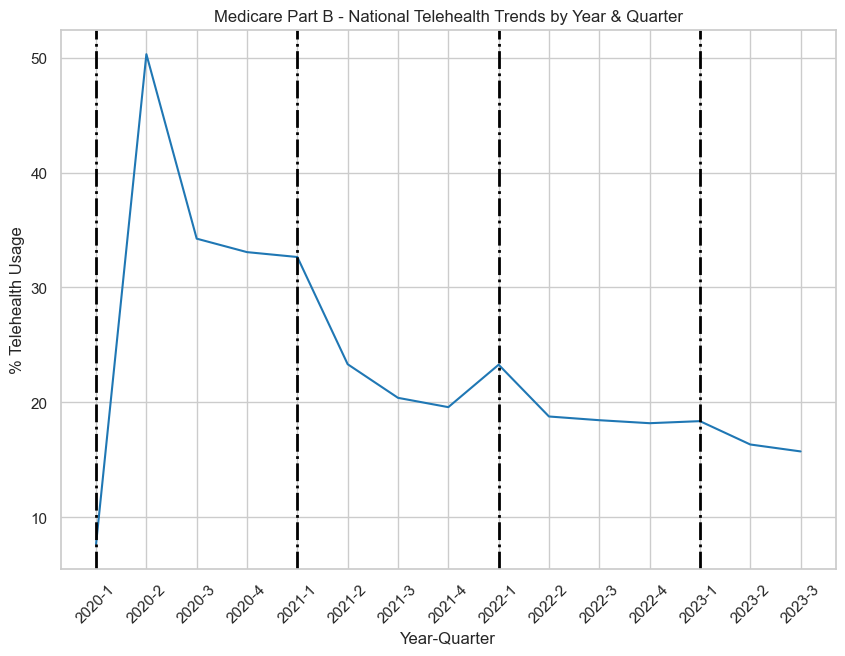

In [600]:
#Quick visualization of overall telehealth trends across the data set (National) from 2020-2023
#Filter df to all states 
value = 'National'
filtered_data = quick_filter(medicare_trends_df,state,value)

#Remove the 'Overall' yearly data and look at each quarter
data_by_quarter = filtered_data[filtered_data['quarter']!='Overall']
data_by_quarter

#Plot the chart in sns
# set plot style: grey grid in the background:
sns.set_theme(style="whitegrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.lineplot(
    x="year-quarter",
    y="pct_actual_users_out_of_eligible_users",
    data=data_by_quarter, 
    color='tab:blue', 
    ci=None);

#Add markers for year
plt.axvline(linewidth=2, linestyle='-.', color='black', x='2020-1')
plt.axvline(linewidth=2, linestyle='-.', color='black', x='2021-1')
plt.axvline(linewidth=2, linestyle='-.', color='black', x='2022-1')
plt.axvline(linewidth=2, linestyle='-.', color='black', x='2023-1')


#labels
plt.xticks(rotation=45)
plt.ylabel('% Telehealth Usage')
plt.xlabel('Year-Quarter')
plt.title('Medicare Part B - National Telehealth Trends by Year & Quarter')

#Observation: Overall telehealth usage is declining year over year; why?

#### Medicaid Service Type Usage Year over Year

In [170]:
#Looking at number of users by telehealth type (year over year trends)
#Note these are national trends

service_counts_by_type_by_year = medicaid_trends_df.groupby(['TelehealthType','Year','Month'])['ServiceCount'].sum().reset_index(name='sum').sort_values(by='TelehealthType', ascending=True)
service_counts_by_type_by_year
#I saved this data as a csv so I can make a good chart in Excel, 
#service_counts_by_type_by_year.to_csv('service_counts_by_type_by_year.csv')


#the excel chart reveals that live audio/video is by far the most used telehealth type
#by filtering that value out we can also see upward trends for store & forward and remote patient monitoring


,TelehealthType,Year,Month,sum
0,Live audio/video,2018,201801,185854.0
32,Live audio/video,2020,202009,10014495.0
33,Live audio/video,2020,202010,10160603.0
34,Live audio/video,2020,202011,9790973.0
35,Live audio/video,2020,202012,11316155.0
...,...,...,...,...
204,Store and forward,2020,202001,5064.0
205,Store and forward,2020,202002,5182.0
206,Store and forward,2020,202003,24308.0
208,Store and forward,2020,202005,49047.0


## 2. TN Medicare Demographic Trends
Telehealth trends are broken down by:
- Race
- Age
- Gender
- Eligibility
- Rural vs. Urban

#### Note: There are no demographic data about medicaid telehealth users, so I will only be looking at Medicare for now

### A. Race

#### Enrollees per race

In [342]:
medicare_trends_df

,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,nunique_eligible_for_telehealth,total_enrollees_Part_B,nunique_users_of_telehealth,pct_actual_users_out_of_eligible_users,year-quarter
0,2020,Overall,National,All,All,All,All,All,All,30946785.0,3.224489e+07,14826919.0,47.91,2020-Overall
1,2020,Overall,National,All,All,All,All,All,Rural,7179538.0,7.490301e+06,2858284.0,39.81,2020-Overall
2,2020,Overall,National,All,All,All,All,All,Urban,23696871.0,2.462914e+07,11944230.0,50.40,2020-Overall
3,2020,Overall,National,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN,2020-Overall
4,2020,Overall,National,All,All,All,All,0-64,All,4088345.0,4.291403e+06,2322324.0,56.80,2020-Overall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21667,2023,3,Virginia,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN,2023-3
21668,2023,3,Washington,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN,2023-3
21669,2023,3,West Virginia,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN,2023-3
21670,2023,3,Wisconsin,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN,2023-3


In [434]:
#Filter by TN, remove "all" 
value = 'Tennessee'
filtered_data = quick_filter(medicare_trends_df,state,value)
filtered_data = filtered_data[filtered_data['Bene_Race_Desc']!='All']
filtered_data = filtered_data[filtered_data['Bene_Race_Desc']!='Other/Unknown']

#Find total enrollee percentage by race
medicare_enrollees_by_race = filtered_data.groupby(['Bene_Race_Desc'])['total_enrollees_Part_B'].sum().reset_index(name='Total Enrollees').sort_values(by='Bene_Race_Desc', ascending=False)
medicare_enrollees_by_race['Percentage'] = round(medicare_enrollees_by_race['Total Enrollees'],2)
medicare_enrollees_by_race['Percentage'] = round(((medicare_enrollees_by_race['Total Enrollees'] / 11657578.25001404)*100),2)
medicare_enrollees_by_race

,Bene_Race_Desc,Total Enrollees,Percentage
4,Non-Hispanic White,1.034502e+07,88.74
3,Hispanic,1.222448e+05,1.05
2,Black/African American,1.088898e+06,9.34
1,Asian/Pacific Islander,9.503292e+04,0.82
0,American Indian/Alaska Native,6.381333e+03,0.05


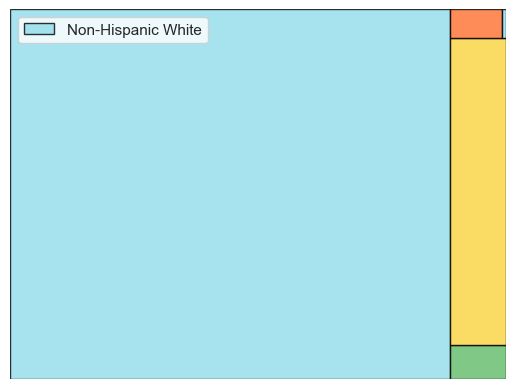

In [435]:
#medicare_enrollees_by_race = medicare_enrollees_by_race[medicare_enrollees_by_race['Bene_Race_Desc']!='All']

# plot it
ax = squarify.plot(sizes=medicare_enrollees_by_race['Total Enrollees'], color = ['#91DCEA', '#5FBB68',
          '#F9D23C', '#FD6F30'], alpha=.8, ec = 'black')
plt.axis('off')
plt.legend(labels=medicare_enrollees_by_race['Bene_Race_Desc'])
plt.show()

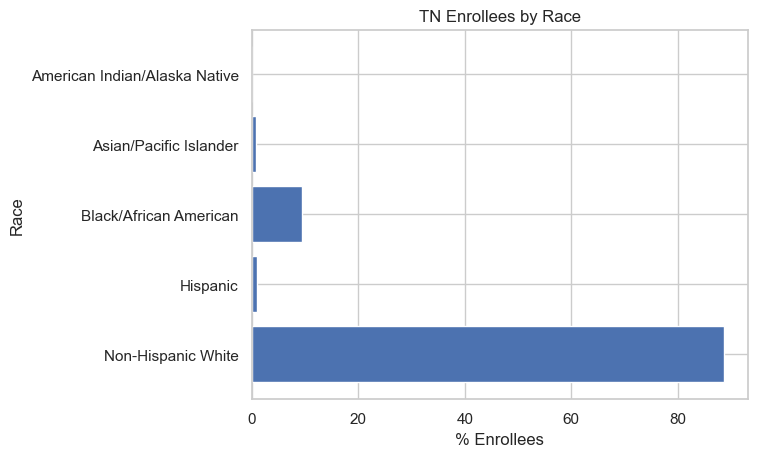

In [436]:
medicare_enrollees_by_race = medicare_enrollees_by_race[medicare_enrollees_by_race['Bene_Race_Desc']!='All']

#define data
height = medicare_enrollees_by_race['Percentage']
bars = medicare_enrollees_by_race['Bene_Race_Desc']
y_pos = np.arange(len(bars))

# Create bars
#plt.bar(bars, height)
plt.barh(bars, width=height)
#plt.xticks(rotation=20)


# Create names on the x-axis and labels
plt.xlabel('% Enrollees')
plt.ylabel('Race')
plt.title('TN Enrollees by Race')

# Show graphic
plt.show()

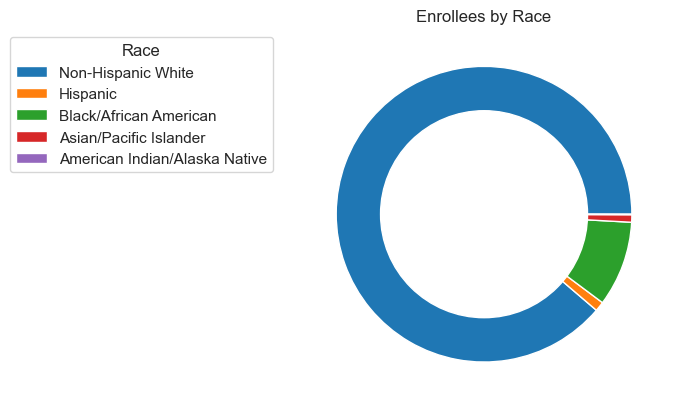

In [542]:
# doughnut chart example
names = medicare_enrollees_by_race['Bene_Race_Desc']
size = medicare_enrollees_by_race['Total Enrollees']

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
#plt.pie(size,autopct='%1.00f%%',colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple']) #with values
plt.pie(size,colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple']) #without values
p = plt.gcf()
p.gca().add_artist(my_circle)


# Show the graph
plt.title('Enrollees by Race')
plt.legend(title = 'Race', labels=names, bbox_to_anchor=(-.05, 1))
plt.show()

#### Percentage telehealth users per race

In [439]:
#Filter by TN, remove "all" and 'other' (there are no values for "other" recorded)
value = 'Tennessee'
filtered_data = quick_filter(medicare_trends_df,state,value)
filtered_data = filtered_data[filtered_data['Bene_Race_Desc']!='All']
filtered_data = filtered_data[filtered_data['Bene_Race_Desc']!='Other/Unknown']
filtered_data['pct_enrollees'] = round(((filtered_data['total_enrollees_Part_B'] / 11657578.25001404)*100),2)

,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,nunique_eligible_for_telehealth,total_enrollees_Part_B,nunique_users_of_telehealth,pct_actual_users_out_of_eligible_users,year-quarter,pct_enrollees
838,2020,Overall,Tennessee,All,American Indian/Alaska Native,All,All,All,All,364.0,397.166667,140.0,38.46,2020-Overall,0.00
889,2020,Overall,Tennessee,All,Asian/Pacific Islander,All,All,All,All,4601.0,5257.833333,1172.0,25.47,2020-Overall,0.05
940,2020,Overall,Tennessee,All,Black/African American,All,All,All,All,66139.0,69093.250000,21600.0,32.66,2020-Overall,0.59
991,2020,Overall,Tennessee,All,Hispanic,All,All,All,All,6059.0,6883.000000,1870.0,30.86,2020-Overall,0.06
1042,2020,Overall,Tennessee,All,Non-Hispanic White,All,All,All,All,595424.0,606119.666670,183624.0,30.84,2020-Overall,5.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21340,2023,3,Tennessee,All,American Indian/Alaska Native,All,All,All,All,212.0,291.666667,18.0,8.49,2023-3,0.00
21341,2023,3,Tennessee,All,Asian/Pacific Islander,All,All,All,All,3440.0,5269.000000,179.0,5.20,2023-3,0.05
21342,2023,3,Tennessee,All,Black/African American,All,All,All,All,36199.0,49329.666667,2873.0,7.94,2023-3,0.42
21343,2023,3,Tennessee,All,Hispanic,All,All,All,All,4321.0,6691.333333,377.0,8.72,2023-3,0.06


In [477]:
#Group telehealth usage trends by race
medicare_trends_by_race = filtered_data.groupby(['Bene_Race_Desc'])['pct_actual_users_out_of_eligible_users'].mean().reset_index(name='avg_pct_users').sort_values(by='Bene_Race_Desc', ascending=False)
medicare_trends_by_race['avg_pct_users'] = round(medicare_trends_by_race['avg_pct_users'],2)
medicare_trends_by_race

,Bene_Race_Desc,avg_pct_users
4,Non-Hispanic White,12.58
3,Hispanic,14.23
2,Black/African American,14.31
1,Asian/Pacific Islander,11.54
0,American Indian/Alaska Native,17.23


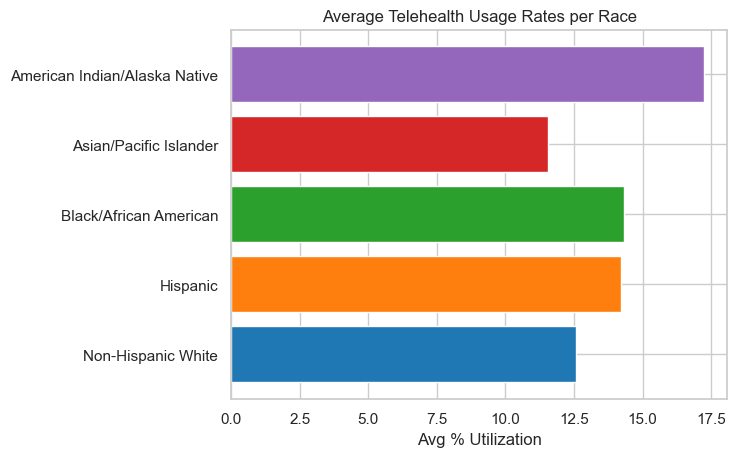

In [541]:
#define data
height = medicare_trends_by_race['avg_pct_users']
bars = medicare_trends_by_race['Bene_Race_Desc']
y_pos = np.arange(len(bars))

# Create bars
#plt.bar(y_pos, height)
plt.barh(bars, width=height, color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple'])
#plt.gca().set_yticklabels([])

# Create names on the x-axis and labels
plt.xlabel('Avg % Utilization')
#plt.ylabel('Race')
plt.title('Average Telehealth Usage Rates per Race')

# Show graphic
plt.show()

In [417]:
#Filter by TN, remove "all" and 'other' (there are no values for "other" recorded)
value = 'Tennessee'
filtered_data = quick_filter(medicare_trends_df,state,value)
filtered_data = filtered_data[filtered_data['Bene_Race_Desc']!='All']
filtered_data = filtered_data[filtered_data['Bene_Race_Desc']!='Other/Unknown']

#Compare: total_enrollees_Part_B, nunique_eligible_for_telehealth, nunique_users_of_telehealth

#Group by race
medicare_trends_by_race = filtered_data.groupby(['Bene_Race_Desc'])[['total_enrollees_Part_B', 'nunique_eligible_for_telehealth', 'nunique_users_of_telehealth']].sum().reset_index().sort_values(by='Bene_Race_Desc', ascending=False)
    
    round(filtered_data['pct_actual_users_out_of_eligible_users'],2)
#df1.merge(df2, how='inner', on='a')
medicare_trends_by_race.head()

,Bene_Race_Desc,total_enrollees_Part_B,nunique_eligible_for_telehealth,nunique_users_of_telehealth
4,Non-Hispanic White,1.034502e+07,8479109.0,1109492.0
3,Hispanic,1.222448e+05,83209.0,12296.0
2,Black/African American,1.088898e+06,838362.0,127955.0
1,Asian/Pacific Islander,9.503292e+04,64328.0,7639.0
0,American Indian/Alaska Native,6.381333e+03,4819.0,873.0


### B. Age

In [480]:
#Filter by TN, remove "all" 
value = 'Tennessee'
filtered_data = quick_filter(medicare_trends_df,state,value)
filtered_data = filtered_data[filtered_data['Bene_Age_Desc']!='All']

#Find total enrollee percentage by age
medicare_enrollees_by_age = filtered_data.groupby(['Bene_Age_Desc'])['total_enrollees_Part_B'].sum().reset_index(name='Total Enrollees').sort_values(by='Bene_Age_Desc', ascending=True)
medicare_enrollees_by_age['Total Enrollees'] = round(medicare_enrollees_by_age['Total Enrollees'],2)
medicare_enrollees_by_age['Percentage'] = round(((medicare_enrollees_by_age['Total Enrollees'] / 11657578.25)*100),2)
medicare_enrollees_by_age

,Bene_Age_Desc,Total Enrollees,Percentage
0,0-64,1368516.75,11.74
1,65-74,5858222.00,50.25
2,75-84,3420542.25,29.34
3,85 and over,1253115.58,10.75


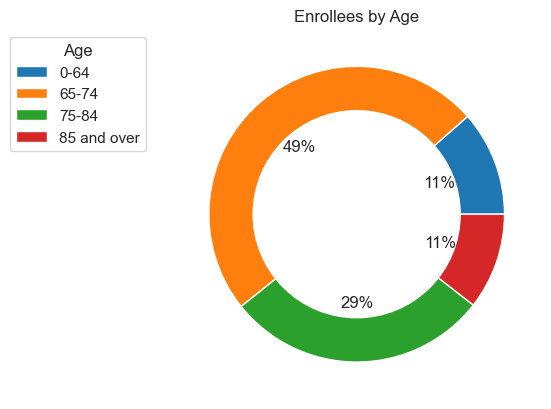

In [539]:
# donut chart
names = medicare_enrollees_by_age['Bene_Age_Desc']
size = medicare_enrollees_by_age['Total Enrollees']
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size,autopct='%1.00f%%',colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple']) #with values
#plt.pie(size) #without values
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.title('Enrollees by Age')
plt.legend(title = 'Age', labels=names, bbox_to_anchor=(-.05, 1))
plt.show()

In [309]:
#Filter by TN, remove "all" 
value = 'Tennessee'
filtered_data = quick_filter(medicare_trends_df,state,value)
filtered_data = filtered_data[filtered_data['Bene_Age_Desc']!='All']

#Group percentage of users by age
medicare_trends_by_age = filtered_data.groupby(['Bene_Age_Desc'])['pct_actual_users_out_of_eligible_users'].mean().reset_index(name='average_pct').sort_values(by='Bene_Age_Desc', ascending=True)
medicare_trends_by_age['average_pct'] = round(medicare_trends_by_age['average_pct'],2)
medicare_trends_by_age

#Note that even though most medicare recipients are elderly/retired, most of the telehealth users are below 64

,Bene_Age_Desc,average_pct
0,0-64,24.05
1,65-74,11.74
2,75-84,10.89
3,85 and over,10.99


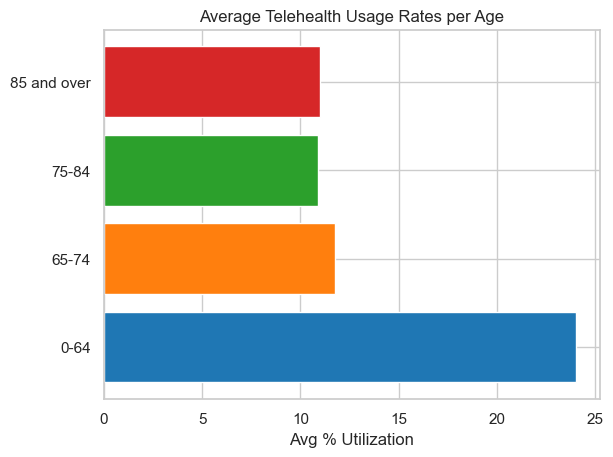

In [538]:
#define data
height = medicare_trends_by_age['average_pct']
bars = medicare_trends_by_age['Bene_Age_Desc']
y_pos = np.arange(len(bars))

# Create bars
#plt.bar(y_pos, height)
plt.barh(bars, width=height, color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple'])
#plt.gca().set_yticklabels([])

# Create names on the x-axis and labels
plt.xlabel('Avg % Utilization')
#plt.ylabel('Race')
plt.title('Average Telehealth Usage Rates per Age')

# Show graphic
plt.show()


### C. Gender

In [248]:
#Filter by TN, remove "all" 
value = 'Tennessee'
filtered_data = quick_filter(medicare_trends_df,state,value)
filtered_data = filtered_data[filtered_data['Bene_Sex_Desc']!='All']

#Find total enrollee percentage by age
medicare_enrollees_by_gender = filtered_data.groupby(['Bene_Sex_Desc'])['total_enrollees_Part_B'].sum().reset_index(name='Total Enrollees').sort_values(by='Bene_Sex_Desc', ascending=True)
medicare_enrollees_by_gender['Total Enrollees'] = round(medicare_enrollees_by_gender['Total Enrollees'],2)
medicare_enrollees_by_gender['Percentage'] = round(((medicare_enrollees_by_gender['Total Enrollees'] / 11657578.25)*100),2)
medicare_enrollees_by_gender

,Bene_Sex_Desc,Total Enrollees,Percentage
0,Female,6569363.67,56.35
1,Male,5331032.92,45.73


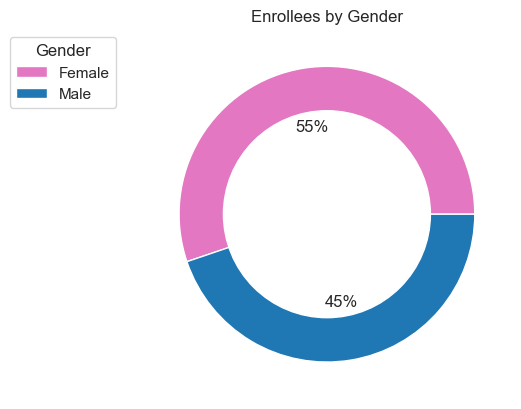

In [536]:
# doughnut chart example
names = medicare_enrollees_by_gender['Bene_Sex_Desc']
size = medicare_enrollees_by_gender['Total Enrollees']

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size,autopct='%1.00f%%',colors=['tab:pink','tab:blue']) #with values
#plt.pie(size) #without values
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.title('Enrollees by Gender')
plt.legend(title = 'Gender', labels=names, bbox_to_anchor=(-.05, 1))
plt.show()

In [260]:
#Filter by TN, remove "all"
value = 'Tennessee'
filtered_data = quick_filter(medicare_trends_df,state,value)
filtered_data = filtered_data[filtered_data['Bene_Sex_Desc']!='All']

#Group by age
medicare_trends_by_gender = filtered_data.groupby(['Bene_Sex_Desc'])['pct_actual_users_out_of_eligible_users'].mean().reset_index(name='average_pct').sort_values(by='average_pct', ascending=False)
medicare_trends_by_gender['average_pct'] = round(medicare_trends_by_gender['average_pct'],2)
medicare_trends_by_gender

#slightly more participation from female medicare recipients

,Bene_Sex_Desc,average_pct
0,Female,13.78
1,Male,11.36


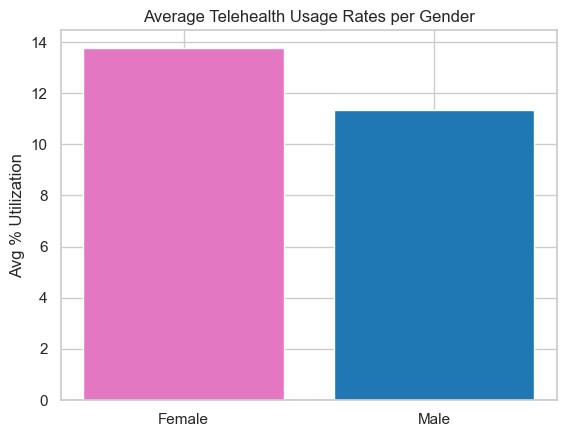

In [535]:
plt.bar(medicare_trends_by_gender['Bene_Sex_Desc'], medicare_trends_by_gender['average_pct'],color=['tab:pink','tab:blue'])
# Create names on the x-axis and labels
plt.ylabel('Avg % Utilization')
#plt.xlabel('Gender')
plt.title('Average Telehealth Usage Rates per Gender')

# Show graphic
plt.show()


### D. Eligibility

In [29]:
medicare_trends_df.Bene_Mdcr_Entlmt_Stus.unique()

array(['All', 'Aged', 'Disabled', 'ESRD'], dtype=object)

In [553]:
#Filter by TN, remove "all" and "Unknown" (there are no recorded values for "unknown")
value = 'Tennessee'
filtered_data = quick_filter(medicare_trends_df,state,value)
filtered_data = filtered_data[filtered_data['Bene_Mdcr_Entlmt_Stus']!='All']

#Find total enrollee percentage by race
medicare_enrollees_by_entitlement = filtered_data.groupby(['Bene_Mdcr_Entlmt_Stus'])['total_enrollees_Part_B'].sum().reset_index(name='Total Enrollees').sort_values(by='Bene_Mdcr_Entlmt_Stus', ascending=True)
medicare_enrollees_by_entitlement['Total Enrollees'] = round(medicare_enrollees_by_entitlement['Total Enrollees'],2)
medicare_enrollees_by_entitlement['Percentage'] = round(((medicare_enrollees_by_entitlement['Total Enrollees'] / 11657578.25)*100),2)
medicare_enrollees_by_entitlement

,Bene_Mdcr_Entlmt_Stus,Total Enrollees,Percentage
0,Aged,10469930.17,89.81
1,Disabled,1307355.92,11.21
2,ESRD,123110.50,1.06


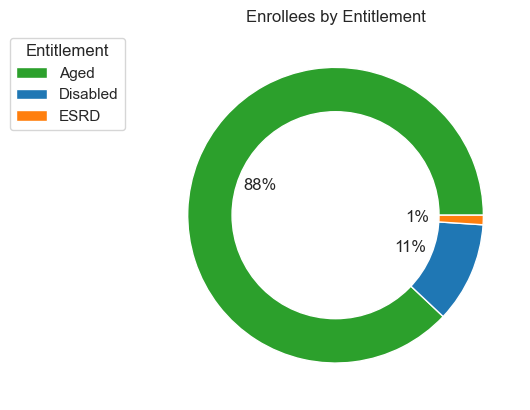

In [561]:
# doughnut chart example
names = medicare_enrollees_by_entitlement['Bene_Mdcr_Entlmt_Stus']
size = medicare_enrollees_by_entitlement['Total Enrollees']

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size,autopct='%1.00f%%',pctdistance=.55, colors=['tab:green','tab:blue','tab:orange']) #with values
#plt.pie(size) #without values
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.title('Enrollees by Entitlement')
plt.legend(title = 'Entitlement', labels=names, bbox_to_anchor=(-.05, 1))
plt.show()

In [562]:
#Find percentage telehealth users by Entitlement
medicare_trends_by_entitlement = filtered_data.groupby(['Bene_Mdcr_Entlmt_Stus'])['pct_actual_users_out_of_eligible_users'].mean().reset_index(name='average_pct').sort_values(by='Bene_Mdcr_Entlmt_Stus', ascending=True)
medicare_trends_by_entitlement['average_pct'] = round(medicare_trends_by_entitlement['average_pct'],2)
medicare_trends_by_entitlement

,Bene_Mdcr_Entlmt_Stus,average_pct
0,Aged,11.29
1,Disabled,24.31
2,ESRD,19.33


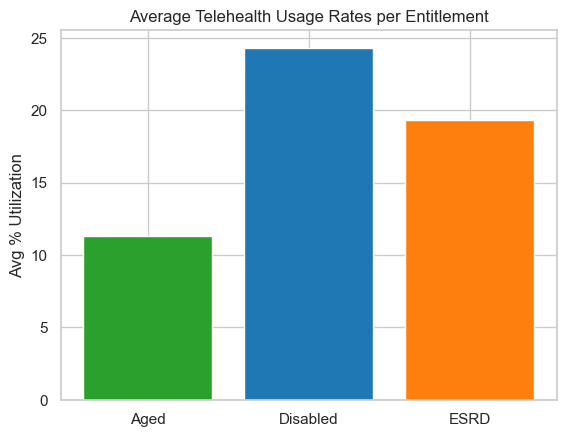

In [568]:
plt.bar(medicare_trends_by_entitlement['Bene_Mdcr_Entlmt_Stus'], medicare_trends_by_entitlement['average_pct'],color=['tab:green','tab:blue','tab:orange'])
# Create names on the x-axis and labels
plt.ylabel('Avg % Utilization')
#plt.xlabel('Gender')
plt.title('Average Telehealth Usage Rates per Entitlement')

# Show graphic
plt.show()

### E. Rural vs. Urban

In [580]:
metric = 'Bene_RUCA_Desc'
name = 'RUCA Designation'

#Filter by TN, remove "All" "Other/Unknown" or "Unknown" values as needed
value = 'Tennessee'
filtered_data = quick_filter(medicare_trends_df,state,value)
filtered_data = filtered_data[filtered_data[metric]!='All']
filtered_data = filtered_data[filtered_data[metric]!='Unknown']


#Find total enrollee percentage by RUCA Designation
medicare_enrollees_by_RUCA_Designation = filtered_data.groupby([metric])['total_enrollees_Part_B'].sum().reset_index(name='Total Enrollees').sort_values(by=metric, ascending=True)
medicare_enrollees_by_RUCA_Designation['Total Enrollees'] = round(medicare_enrollees_by_RUCA_Designation['Total Enrollees'],2)
medicare_enrollees_by_RUCA_Designation['Percentage'] = round(((medicare_enrollees_by_RUCA_Designation['Total Enrollees'] / 11657578.25)*100),2)
medicare_enrollees_by_RUCA_Designation

,Bene_RUCA_Desc,Total Enrollees,Percentage
0,Rural,4003776.25,34.34
1,Urban,7882275.33,67.62


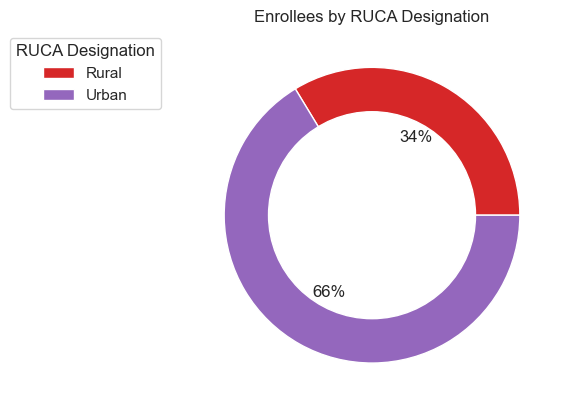

In [582]:
#donut chart 
names = medicare_enrollees_by_RUCA_Designation['Bene_RUCA_Desc']
size = medicare_enrollees_by_RUCA_Designation['Total Enrollees']

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size,autopct='%1.00f%%',colors=['tab:red','tab:purple']) #with values
#plt.pie(size) #without values
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.title('Enrollees by RUCA Designation')
plt.legend(title = 'RUCA Designation', labels=names, bbox_to_anchor=(-.05, 1))
plt.show()

In [588]:
#Find percentage telehealth users by RUCA Designation
medicare_trends_by_RUCA_Designation = filtered_data.groupby(['Bene_RUCA_Desc'])['pct_actual_users_out_of_eligible_users'].mean().reset_index(name='average_pct').sort_values(by='Bene_RUCA_Desc', ascending=True)
medicare_trends_by_RUCA_Designation['average_pct'] = round(medicare_trends_by_RUCA_Designation['average_pct'],2)
medicare_trends_by_RUCA_Designation

,Bene_RUCA_Desc,average_pct
0,Rural,11.48
1,Urban,13.38


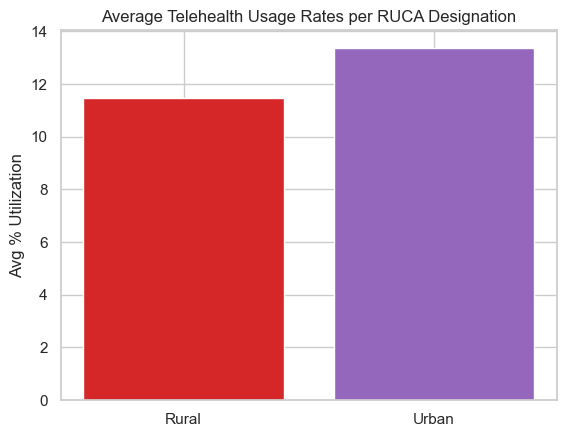

In [590]:
plt.bar(medicare_trends_by_RUCA_Designation['Bene_RUCA_Desc'], medicare_trends_by_RUCA_Designation['average_pct'],color=['tab:red','tab:purple'])
# Create names on the x-axis and labels
plt.ylabel('Avg % Utilization')
#plt.xlabel('Gender')
plt.title('Average Telehealth Usage Rates per RUCA Designation')

# Show graphic
plt.show()

#### Medicare Demographic trends in violin chart form: 

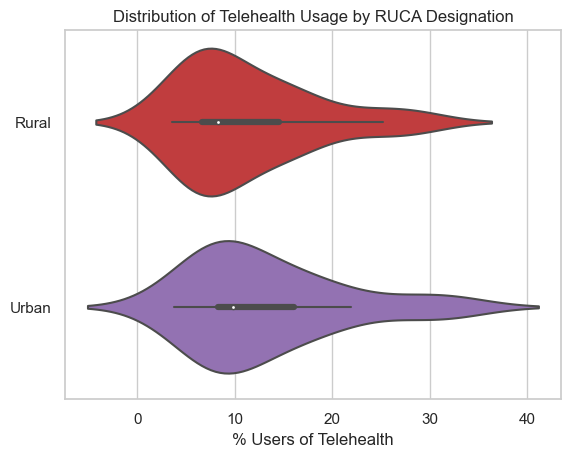

In [576]:
#Change these according to the column you want to chart:
metric = 'Bene_RUCA_Desc'
name = 'RUCA Designation'

#Filter by TN, remove "all" and "Unknown" (there are no recorded values for "unknown")
value = 'Tennessee'
filtered_data = quick_filter(medicare_trends_df,state,value)
filtered_data = filtered_data[filtered_data[metric]!='All']
filtered_data = filtered_data[filtered_data[metric]!='Unknown']
filtered_data = filtered_data.sort_values(by=metric,ascending=True)

#Set colors and theme 
sns.set_theme(style="whitegrid")
colors=['tab:red','tab:purple','tab:orange']

#Plot violin chart
sns.violinplot(x=filtered_data['pct_actual_users_out_of_eligible_users'],y=filtered_data[metric], palette=colors)
plt.xlabel('% Users of Telehealth')
plt.ylabel(f"{''}")
plt.title('Distribution of Telehealth Usage by 'f"{name}")
plt.show()

## 3. TN County Health Trends

According to the TN Rural Health Care Task Force, rural residents are at particular risk for “poor health outcomes, including mental health challenges, obesity, and substance misuse”. 

78 of Tennessee's 95 counties are classified as rural (82%)

The focus of the analysis shall be on two risk factors: Mental Health and Obesity

Method: Analyze the correlation between healthcare accessibility factors and the various health factors within each topic (mental health and obesity). Where trends emerge, look for overlapping counties with multiple high risk variables

### Correlations Between Mental Health Variables and Demographics

The following variables in the CHRR dataframe are related to mental health outcomes: 

Clinical Care: 
- Mental Health Providers

Quality of Life/Health Factors:
- Poor Mental Health Days
- Frequent Mental Distress*
- Insufficient Sleep*

Health Factors:
- Drug Overdose Deaths*
- Alcohol-Impaired Driving Deaths
- Excessive Drinking

Social & Economic Factors:
- Disconnected Youth*
- Unemployment
- Suicides*

In [83]:
CHRR_df.head()

,FIPS,State,County,Average Number of Mentally Unhealthy Days,Mentally Unhealthy Days Z-Score,% Adults with Obesity,Adult Obesity Z-Score,Food Environment Index,Food Environment Index Z-Score,% Physically Inactive,Physically Inactive Z-Score,% With Access to Exercise Opportunities,Exercise Opportunities Z-Score,% Excessive Drinking,Excessive Drinking Z-Score,# Alcohol-Impaired Driving Deaths,# Driving Deaths,% Driving Deaths with Alcohol Involvement,Drunk Driving Deaths Z-Score,# Uninsured,% Uninsured,Uninsured Z-Score,# Primary Care Physicians,Primary Care Physicians Rate,Primary Care Physicians Ratio,PCP Z-Score,# Mental Health Providers,Mental Health Provider Rate,Mental Health Provider Ratio,Mental Health Providers Z-Score,Preventable Hospitalization Rate,Preventable Hospitalization Z-Score,Preventable Hosp. Rate (AIAN),Preventable Hosp. Rate (Asian),Preventable Hosp. Rate (Black),Preventable Hosp. Rate (Hispanic),Preventable Hosp. Rate (White),# Unemployed,Labor Force,% Unemployed,Unemployed Z-Score,% Children in Poverty,Child Poverty Z-Score,% Children in Poverty (AIAN),% Children in Poverty (Asian),% Children in Poverty (Black),% Children in Poverty (Hispanic),% Children in Poverty (White),80th Percentile Income,20th Percentile Income,Income Ratio,Income Z-Score,# Children in Single-Parent Households,# Children in Households,% Children in Single-Parent Households,Children in Single Parent Households Z-Score,Life Expectancy,Life Expectancy (AIAN),Life Expectancy (Asian),Life Expectancy (Black),Life Expectancy (Hispanic),Life Expectancy (White),# Deaths,Age-Adjusted Death Rate,Age-Adjusted Mortality (AIAN),Age-Adjusted Mortality (Asian),Age-Adjusted Mortality (Black),Age-Adjusted Mortality (Hispanic),Age-Adjusted Mortality (White),% Frequent Mental Distress,% Adults with Diabetes,# Food Insecure,% Food Insecure,# Limited Access to Healthy Foods,% Limited Access to Healthy Foods,# Drug Overdose Deaths,Drug Overdose Mortality Rate,Drug Overdose Mortality Rate (AIAN),Drug Overdose Mortality Rate (Asian),Drug Overdose Mortality Rate (Black),Drug Overdose Mortality Rate (Hispanic),Drug Overdose Mortality Rate (White),% Insufficient Sleep,# Uninsured Adults,% Uninsured Adults,# Uninsured Children,% Uninsured Children,Other Primary Care Provider Rate,Other Primary Care Provider Ratio,% Disconnected Youth,Women's Median Earnings,Men's Median Earnings,Gender Pay Gap,Median Household Income,Household Income (AIAN),Household Income (Asian),Household Income (Black),Household Income (Hispanic),Household Income (White),% Household Income Required for Child Care Expenses,# Child Care Centers,"Child Care Centers per 1,000 Children",# Deaths.1,Suicide Rate (Age-Adjusted),Crude Rate,Suicide Rate (AIAN),Suicide Rate (Asian),Suicide Rate (Black),Suicide Rate (Hispanic),Suicide Rate (White),% Households with Broadband Access,# Households with Broadband Access,Population,% Less than 18 Years of Age,% 65 and Over,# Black,% Black,# American Indian or Alaska Native,% American Indian or Alaska Native,# Asian,% Asian,# Native Hawaiian or Other Pacific Islander,% Native Hawaiian or Other Pacific Islander,# Hispanic,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,% Female,# Rural Residents,% Rural
1,47001,Tennessee,Anderson,5.283177,-0.309091,35.5,-0.807675,7.5,-0.465578,25.3,-0.675735,65.243831,-0.749778,17.295554,1.412505,13,55,23.636364,-0.109804,6839,11.281569,-1.035460,37.0,47.70623,2096:1,-0.114695,79.0,101.83562,982:1,-0.139859,2788,-0.632757,NaN,NaN,2090.0,NaN,2790.0,1333,34816,3.828699,-0.570906,18.7,-0.516539,NaN,0.701754,9.574468,13.897937,18.115497,107739,24316,4.430786,-0.332246,4592,16374,28.044461,0.354258,74.7,NaN,NaN,73.2,97.7,74.4,1486,507,NaN,NaN,559.0,NaN,520.0,18,11,11350,15,1984.0,3.0,121.0,52.0,NaN,NaN,NaN,NaN,NaN,35,6066,14,849,5,150,669:1,NaN,39849,48546,0.82,58633,NaN,69276.0,36739.0,63892.0,55827.0,25,50.0,12,75.0,20.0,20.0,NaN,NaN,NaN,NaN,NaN,86,26503,77576,21.2,2

In [84]:
#First I'll create a basic dataframe with all the demographics and other data, so I can reuse and reorder the variables:
a = 'FIPS'
b = 'County'
c = 'Life Expectancy'
d = 'Population'
e = '% Less than 18 Years of Age'
f = '% 65 and Over'
g = '% Black'
h = '% American Indian or Alaska Native'
i = '% Asian'
j = '% Native Hawaiian or Other Pacific Islander'
k = '% Hispanic'
l = '% Non-Hispanic White'
m = '% Not Proficient in English'
n = '% Female'
o = '% Rural'
p = '% Households with Broadband Access'
q = '% Children in Poverty'
r = '% Children in Single-Parent Households'
s = '% Uninsured Children'

demographics = CHRR_df[[a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s]]
#demographics.head()

In [131]:
#Then I want to create another df with the mental health variables, plus FIPS and County so I can merge later
#variable columns: 
var1 = 'Mental Health Provider Rate'
var2 = 'Average Number of Mentally Unhealthy Days'
var3 = '% Frequent Mental Distress'
var4 = '% Insufficient Sleep'
var5 = 'Drug Overdose Mortality Rate'
var6 = '% Driving Deaths with Alcohol Involvement'
var7 = '% Excessive Drinking'
var8 = '% Disconnected Youth'
var9 = '% Unemployed'
var10 = 'Suicide Rate (Age-Adjusted)'

mental_health_variables = CHRR_df[[a,b,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10]]

In [ ]:
#Merge demographics with mental health variables
mental_health_df = demographics.merge(mental_health_variables)

In [133]:
#drop first two columns so that there are only numeric data for correlation analysis
mental_health_correlations = mental_health_df.drop([a, b], axis=1)

#use .corr() to examine if there are any relationships between the mental health variables and demographics
mental_health_correlations = mental_health_correlations.corr()
#mental_health_correlations

#I saved the results to a csv and used google sheets to apply conditional formatting and highlight correlations
#mental_health_correlations.to_csv('mental_health_correlations.csv')

##### Strong Positive Correlations (over .7)
- Average Number of Mentally Unhealthy Days and % Frequent Mental Distress (0.7893453542)
- % Disconnected Youth and % Frequent Mental Distress (0.7420026506)
- Population and % Asian (0.7478482493)
- % Hispanic and % Not Proficient in English (0.7017949064)

##### Slight Positive Correlations (.6 to .69)
- Average Number of Mentally Unhealthy Days and % Disconnected Youth (0.6838628183)
- Life Expectancy and % Asian (0.6339640993)
- % Disconnected Youth and % Rural (0.6803646905)
- % Asian and % Households with Broadband Access (0.6027683762)

##### Strong Negative Correlations (under -.7)
- % Non-Hispanic White and % Black (-0.9629489514) 
- % Households with Broadband Access and % Disconnected Youth (-0.7732368548)
- % Asian and % Frequent Mental Distress (-0.7555997235)
- % Households with Broadband Access and % Frequent Mental Distress (-0.7064048201)
- Life Expectancy and % Frequent Mental Distress (-0.7062932683)


#### Slight Negative Correlations (-.6 to -.69)
- % Insufficient Sleep and % Excessive Drinking (-0.6999499361)
- Life Expectancy and % Disconnected Youth (-0.6950208498)
- % Rural and % Households with Broadband Access (-0.6641905053)
- Average Number of Mentally Unhealthy Days and % Asian (-0.6503108963)
- Life Expectancy and Average Number of Mentally Unhealthy Days (-0.6285612055)
- Average Number of Mentally Unhealthy Days and % Households with Broadband Access (-0.6251370564)
- % Disconnected Youth and % Asian (-0.6177181997)
- Mental Health Provider Rate and % Rural (-0.6038839708)

*Strong correlation between counties with higher percentage of rural population and low numbers of mental health providers compared to population*

*Strong correlation between rural populations and high percentages of "diconnected youths"*



##### Strong Correlations by sub-topic:
Mental Health and Rural Disconnected Youths
- Mental Health Provider Rate
- Average Number of Mentally Unhealthy Days
- % Frequent Mental Distress
- % Disconnected Youth
- % Rural
- % Households with Broadband Access

[[var1,var2,var3,var8,o,p]]

Children Overall
- % Less than 18 Years of Age
- % Disconnected Youth
- % Children in Poverty
- % Children in Single-Parent Households
- % Uninsured Children

[[e,var8,q,r,s]]

Substance Abuse
- Life Expectancy
- Suicide Rate (Age-Adjusted)
- % Insufficient Sleep 
- % Excessive Drinking

[[c,var10,var4,var7]]

#Create a correlagram


In [603]:
#To show a correlogram, I need to break down the data into less variables 

#Is there a correlation between life expectancy and mental health providers? 
rural_youth_mental_health = mental_health_df[[var1,o,var8,var3,var2]]
children_mental_health = mental_health_df[[e,var8,q,r,s]]
substance_abuse = mental_health_df[[c,var10,var4,var7]]

#Is there a correlation between rural populations and rates of disconnected youth, unemployment

In [604]:
rural_youth_mental_health.corr()

,Mental Health Provider Rate,% Rural,% Disconnected Youth,% Frequent Mental Distress,Average Number of Mentally Unhealthy Days
Mental Health Provider Rate,1.000000,-0.603884,-0.483177,-0.464834,-0.277217
% Rural,-0.603884,1.000000,0.680365,0.579381,0.406336
% Disconnected Youth,-0.483177,0.680365,1.000000,0.742003,0.683863
% Frequent Mental Distress,-0.464834,0.579381,0.742003,1.000000,0.789345
Average Number of Mentally Unhealthy Days,-0.277217,0.406336,0.683863,0.789345,1.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

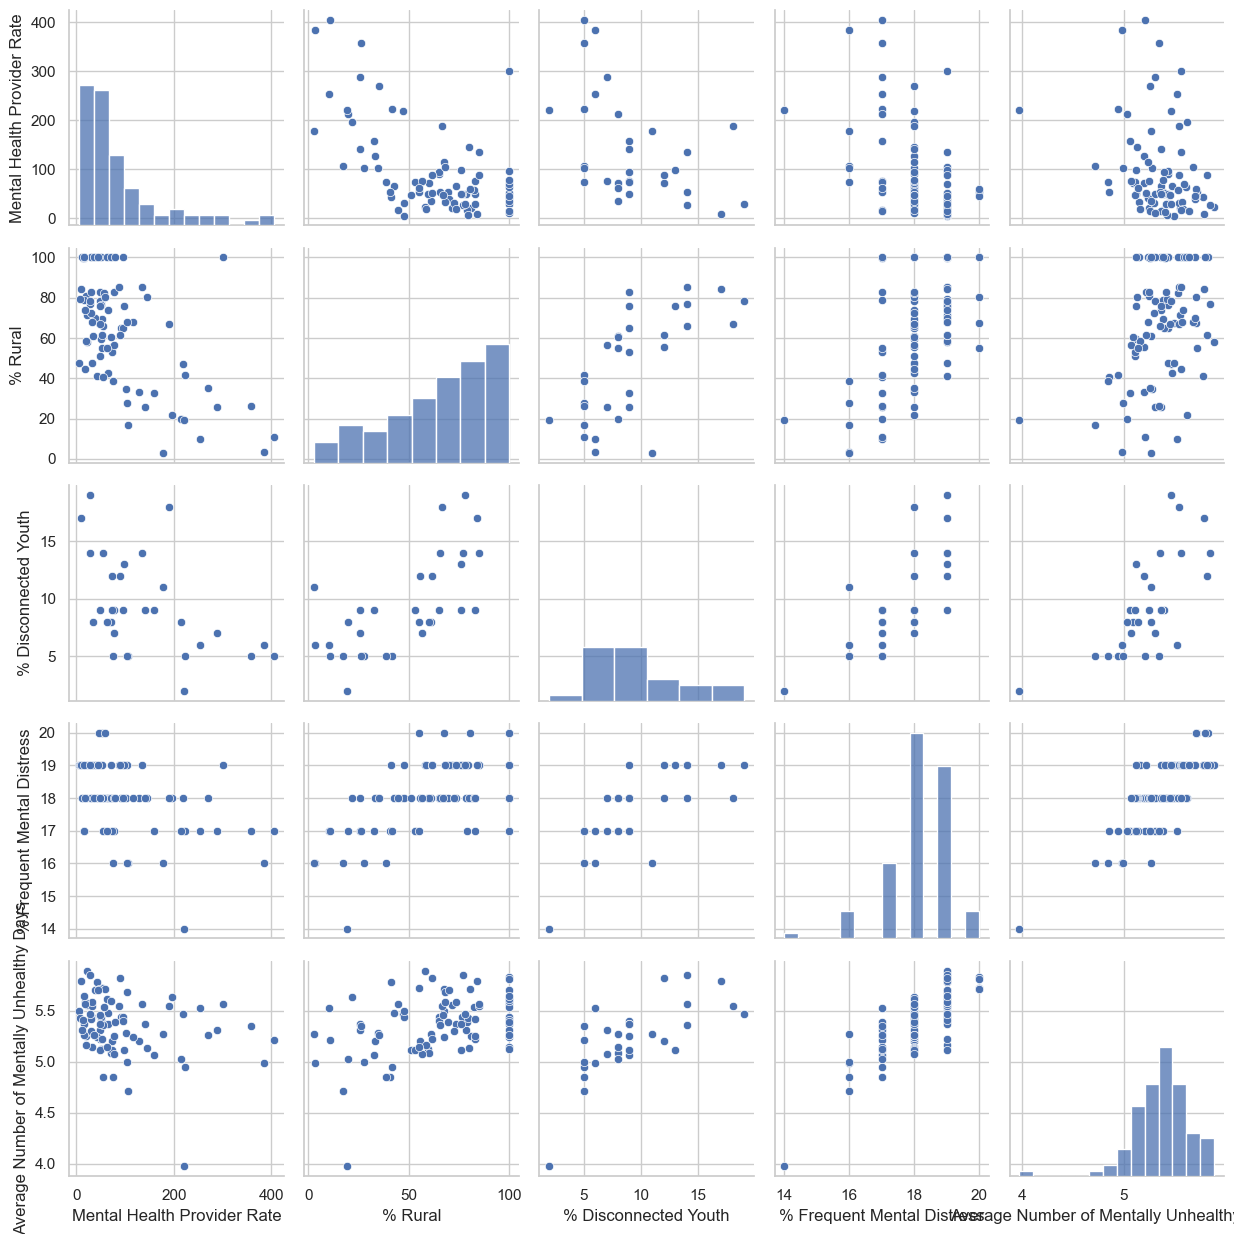

In [605]:
# Create the correlogram
data = rural_youth_mental_health
sns.pairplot(data)
plt.tight_layout()
plt.show()

In [53]:
#correlogram
# left
#sns.pairplot(life_expectancy_corr, kind="scatter", hue='Life Expectancy', markers=["o", "s", "D"], palette="Set2")
#plt.show()

In [54]:
#correlogram
# right: you can give other arguments with plot_kws.
#sns.pairplot(mental_health_matrix, kind="scatter", hue="% Not Proficient in English", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
#plt.show()

#### Create individual graphs for

a = 'FIPS'
b = 'County'
c = 'Life Expectancy'
d = 'Population'
e = '% Less than 18 Years of Age'
f = '% 65 and Over'
g = '% Black'
h = '% American Indian or Alaska Native'
i = '% Asian'
j = '% Native Hawaiian or Other Pacific Islander'
k = '% Hispanic'
l = '% Non-Hispanic White'
m = '% Not Proficient in English'
n = '% Female'
o = '% Rural'
p = '% Households with Broadband Access'
q = '% Children in Poverty'
r = '% Children in Single-Parent Households'
s = '% Uninsured Children'

var1 = 'Mental Health Provider Rate'
var2 = 'Average Number of Mentally Unhealthy Days'
var3 = '% Frequent Mental Distress'
var4 = '% Insufficient Sleep'
var5 = 'Drug Overdose Mortality Rate'
var6 = '% Driving Deaths with Alcohol Involvement'
var7 = '% Excessive Drinking'
var8 = '% Disconnected Youth'
var9 = '% Unemployed'
var10 = 'Suicide Rate (Age-Adjusted)'

- % Disconnected Youth and % Rural (0.6803646905)
- % Disconnected Youth and % Frequent Mental Distress (0.7420026506)
- % Frequent Mental Distress (0.7893453542) and Average Number of Mentally Unhealthy Days 


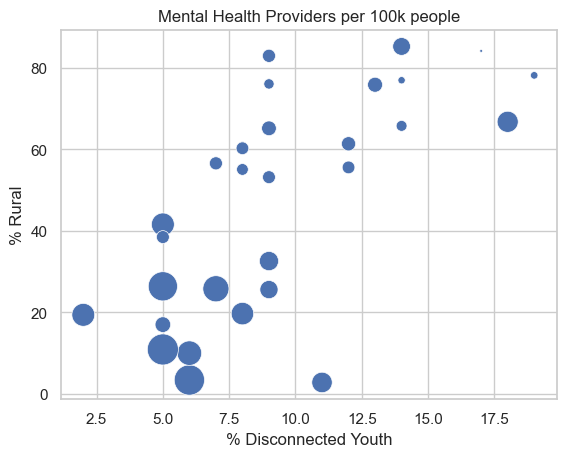

In [617]:
data = mental_health_df[[var1,o,var8,var3,var2]]

#Create individual graphs
sns.set_theme(style="whitegrid")

# use the scatterplot function to build the bubble map
sns.scatterplot(
    data=data,
    x='% Disconnected Youth',
    y="% Rural",
    size="Mental Health Provider Rate",
    legend=False,
    sizes=(0,500)
)
#plt.xlabel('% Users of Telehealth')
#plt.ylabel(f"{''}")
plt.title('Mental Health Providers per 100k people')

# show the graph
plt.show()

### B. Obesity 

Clinical Care: 
- Primary Care Physicians

Quality of Life/Health Factors:
- Diabetes Prevalence* 
- Adult Obesity
- Physical Inactivity

Health Factors:
- Food Environment Index
- Food Insecurity*
- Limited Access to Healthy Foods*



## 4. Telehealth Challenges 
- [Overview](https://www.countyhealthrankings.org/strategies-and-solutions/what-works-for-health/strategies/telemedicine)



- Broadband Access
- Uninsured (overall, adults, and children)
- Tech literacy (esp by age group) - no data set for this

# Part IV: Insights

Overall:
- National trend after covid is higher than before, although it has trended downward over last 3 years. 

Telehealth Types: 
- Live video/audio are by far the most used methods, however if we remove that variable you can see upwards trends in store & forward as well as remote patient monitoring. This suggests the focus is not just in how patients use technology but also how providers incorporate Telehealth into their available services. Adoption strategies may benefit from a focus on provider's technical literacy (not just patients)
- Policy may also play a role. Many rural populations rely on medicaid or medicare for health care. A 2020 report outlines state medicaid policies as one of the challenges in using telehealth to address opioid addiction. The report includes a state readiness assessment for implementing telehealth delivery methods. An assessment of TN’s readiness reveals a few gaps in coverage. For example, the CCHP (Center for Connected Health Policy) has a helpful policy map comparison that shows TN is behind other states in allowing medicaid reimbursement for remote patient monitoring as well as “Store and Forward” medical diagnostic processing. 

Macon, Overton, Haywood, and Polk Counties have a great need for Mental Health Providers
[here](https://www.countyhealthrankings.org/health-data/tennessee?year=2023&measure=Mental+Health+Providers&tab=0)
#Haywood, Macon, Overton, Polk, and Morgan counties are the lowest 5 counties for Mental Health Provider Rates


*Out of all the demographic variables, the rate of mental health providers is most strongly correlated with higher percentages of rural populations*

*rural populations are also strongly correlated with higher percentages of "disconnected youths" or children who are neither working nor in school.*

*If we look at other factors such as: 
    - Children in Single Parent Household
    - Children in Poverty
	- Uninsured Children
    
##### Consider that (at least according to the medicare data) younger people are much more likely to use telehealth services. This suggests that targeting high-risk rural youths for telehealth mental health services has a potential for high impact.  

However, its important to put these findings into context. Telelmedicine is not a replacement for in-person mental health treatment. Rather it is a good candidate for adding flexibility, continuity, and shoring up existing support-systems. 

For example:
- Leverage behavioral health apps and social media groups/sites. For example, there is an app called Smart Recovery, that is geared towards recovering addicts. It provides self-help articles, a chat community, local support group information and scheduling (available both in person and online), a catalog of recovery tools and tips, and an interactive section that provides motivaitonal quotes and directed tasks to distract from addictive urges. There are also apps like betterhelp that provide counseling. Compiling a lsit of similar apps and distributing it to places such as schools, community centers, libraries, trade schools, community colleges, websites, etc, could help raise awareness of the available resources and improve outcomes. 
 - Help providers improve their technical literacy and integrate telehealth techniques into their practice. For example, one barrier ot entry is scheduling an initial meeting with a provider. A lot of youth don't necessarily know how to set up their own appointments, and may become frustrated with phone scheduling. Online scheduling is much easier, and would allow patients to plan out future visits based on provider's transparent availability. 
 - Another idea is allowing consultations that accomodate both live and store and forward techniques, so that those with limited internet can initiate treatment with a lower barrier
 - Promotion of Health Portals to facilitate provider and patient communication. This could include sending surveys, diagnostics, articles or resources related to mental health, prescription management, and case management (for patients with complex needs and multiple providers). 
 - Having the option to switch between in person and telemedicine appointments as needed. Sometimes people cant get to the in person office. These shouldnt be pushed as the main method of treatment however, as in person treatment has distinct advantages. 

[Categories of Telemedicine](https://mdportal.com/education/telemedicine-categories/) 

- 'Mental health is another area that is rapidly adopting remote patient monitoring. Often, anomalies in patient’s physical movement patterns, and even shifts in patient’s mobile phone usage can act as a proxy for changes to their mental condition. With these methods, some suggest it is possible to signal early signs of depression and allow medical providers and family members to quickly respond with interventions.'

[Geographies of Opportunity](https://measureofamerica.org/congressional-districts-2015/) *Published APRIL 22, 2015*
- 'There are over 5.5 million disconnected youth in the United States—young people between the ages of 16 and 24 who are out of work and out of school. In 32 districts, at least one in every five youth are disconnected. These districts are concentrated in the South and Southwest.'

[Ensuring an Equitable Recovery: Addressing Covid-19’s Impact on Education](https://measureofamerica.org/youth-disconnection-2023/) *Published OCTOBER 3, 2023*

[Also see the interactive charts here](https://www.measureofamerica.org/DYinteractive/)

- '**Disconnected youth are young people between the ages of 16 and 24 who are not in school and not working.** The youth disconnection rate tells us a lot about the opportunities available to teens and young adults...Society pays a price in terms of reduced competitiveness, lower tax revenues, and higher health, social services, and criminal justice costs, to name just a few.'
- Rural counties have a youth disconnection rate of 17.3 percent, on average, compared to 11.2 percent in urban centers and 9.9 percent in suburbs

Note that TN is in the higher range nationally, with a 13.5% Disconnected Youth rate

[A Rural Youth Consumer Perspective of Technology to Enhance Face-to-Face Mental Health Services](https://link.springer.com/article/10.1007/s10826-016-0472-z)
*Published 18 June 2016*

 - 'The consumer-based perspectives and experiences reported in the current study are in line with a growing body of literature which advocates for the applicability of **a mix of on and offline mental health support** for some consumers. As such, the term **“blended care”** (i.e. a combination of online and offline components coordinated in a face-to-face mental health setting) has now entered the literature (Wentzel et al., 2016)'

 - 'applications that enhance or promote and don’t seek to replace the desired personal connection are more likely to be better received and utilised by youth mental health consumers...Low cost and limited internet dependent alternatives should be a focus for future research and design, **for example teleconsultations that allow for live and ‘store and forward’ modes** to accommodate those with limited or unreliable internet access (Gillis 2015).'

 - 'If designed sensitively and inclusively, **technology-based additions to care could offer welcome opportunities for young people to participate more meaningfully in their care.** **For example, flexibility and shared decision-making**, two attributes often linked to technology-based additions to care, have been linked to improved patient satisfaction and overall health outcomes (Clever et al. 2006; Swanson et al. 2007)."

[Telehealth for Social Interventions With Adolescents and Young Adults: Diverse Perspectives
](https://www.tandfonline.com/doi/full/10.1080/0312407X.2022.2077120?casa_token=wO8mGMnA1S8AAAAA%3AgraGoshpJxA8i4r_3ulRYZvtLvfH_9Hp_HfAZgbnKNVoP6cHoCw4o0u6LTcjcck_YwIkkwy7UzSr)*Published 17 Jul 2022*
- 'Telehealth can be seen as an additional modality to be carefully considered, rather than as a substitute for care as usual.'

[Medicare & Medicaid Telehealth policies](https://telehealth.hhs.gov/providers/telehealth-policy/medicare-and-medicaid-policies)

# Further Research

Many factors can play a role in health outcomes. The TN Department of Health has a webpage that outlines many contributing factors to poor health outcomes in rural populations.  Any of these could be explored further in the context of this analysis: 
 - average proximity to hospitals
  - food scarcity 
  - physical activeness trends 
  - internet or broadband access
  - health and nutrition literacy
  - social isolation levels
  - socioeconomic status by county

#### Additional Articles & Resources
- [Telehealth.HHS.gov](https://telehealth.hhs.gov/research-articles) - Additional research articles and papers on the impact and uses of telehealth, maintained by the HRSA Office for Advancement of Telehealth
- [CHRR Strategies for Telehealth](https://www.countyhealthrankings.org/strategies-and-solutions/what-works-for-health/strategies?keywords=telemedicine&sort_by=search_api_relevance) - Strategy guides with extensive research notes and citations. Includes evidence-informed strategies to create communities where everyone can thrive.
- [Additional CHRR Tennessee Data and Resources](https://www.countyhealthrankings.org/health-data/tennessee/data-and-resources) - These data sources provide information for communities looking for more local data. These sources provide either unique, local data; more information on demographic breakdowns (e.g., age, sex, race/ethnicity); or data for sub-county geographic units (e.g., cities, zipcodes or school districts).

[Reconnecting Youth](https://youth.gov/youth-topics/opportunity-youth/reconnecting-youth?q=)

## References (for me only)

In [ ]:
#Treemap (not very useful but keeping it for reference)
service_counts_by_type = medicaid_trends_df.groupby(['TelehealthType'])['ServiceCount'].sum().reset_index(name='sum').sort_values(by='TelehealthType', ascending=True)

# Create a data frame with fake data
#df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })

# plot it
squarify.plot(sizes=service_counts_by_type['sum'], label=service_counts_by_type['TelehealthType'], alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
# doughnut chart example
names = medicare_trends_by_age['Bene_Age_Desc']
size = medicare_trends_by_age['average_pct']
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names)
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

Groupby Example:
#Count the number of times each country occurs in the data frame using a groupby
#First indicate the column to group by (country)
#Then indicate the column to perform the calculation on (also country)
#Use value counts to count number of times each category occurs in df
#reset the index to turn the result into a dataframe and name the new column 'count'
#Finally sort values to get the list in order of count descending
top_countries = gourds.groupby(['country'])['country'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)
top_countries
